In [1]:
import numpy as np
import pandas as pd
import math
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import pickle

In [2]:
data=pd.read_csv('./data/training_set_2.csv',index_col=0)
# P=[1]*2412
# N=[0]*6961
# all=P+N
# data["label"]=all
data=data.sample(frac=1,random_state=1)
train,test=train_test_split(data,test_size=0.2,random_state=1)
train_x=train.drop(["label"],axis="columns")
train_y=train["label"]
test_x=test.drop(["label"],axis="columns")
test_y=test["label"]

In [6]:
train_y

4J20A                   0
1MTPA                   0
ENSSSCP00000047640.1    1
ENSCINP00000036114.1    1
4G6TB                   0
                       ..
3JV1A                   0
ENSCHIP00000010520.1    1
ENSOARP00000019679.1    1
2XOCA                   0
ENSAPLP00000015679.1    1
Name: label, Length: 8835, dtype: int64

In [3]:
model = xgb.XGBClassifier(n_estimators=550, max_depth=5, min_child_weight=6, seed= 0,learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, gamma=0.1, reg_alpha=0,reg_lambda=1, silent=True)

In [7]:
model.fit(train_x,train_y)

[16:41:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=6,
              missing=nan, monotone_constraints='()', n_estimators=550,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [8]:
pickle.dump(model, open("./XGBoost/model.pickle.dat", "wb"))

In [9]:
y_test_pred = model.predict(test_x)
y_test_pred=list(y_test_pred)

In [10]:
y_test_pred

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,y_test_pred)   
newdata={"name":list(test_x.index),
         "true":list(test_y),
         "pre":list(y_test_pred)}
newdata=pd.DataFrame(newdata)
for i in newdata.index:
    if newdata.loc[i,"pre"]==newdata.loc[i,"true"]:#如果预测结果和序列本身的属性一样就记录为T
        newdata.loc[i,"prediction"]="T"
    else:
        newdata.loc[i,"prediction"]="F"


for i in newdata.index:
    if newdata.loc[i,"pre"]==newdata.loc[i,"true"]:#如果预测结果和序列本身的属性一样就记录为T
        newdata.loc[i,"prediction"]="T"
    else:
        newdata.loc[i,"prediction"]="F"
for i in newdata.index:
    if newdata.loc[i,"pre"]==newdata.loc[i,"true"]:#如果预测结果和序列本身的属性一样就记录为T
        newdata.loc[i,"prediction"]="T"
    else:
        newdata.loc[i,"prediction"]="F"
for i in newdata.index:
    if newdata.loc[i,"true"]==1:
        newdata.loc[i,"RBP"]="P"
    else:
        newdata.loc[i,"RBP"]="N"
newdata["ACC_MCC"]="NULL"
for i in newdata.index :
    if newdata.iloc[i,-2]=="P":
        if newdata.iloc[i,-3]=="T":
            newdata.iloc[i,-1]="TP"
        else:
            newdata.iloc[i,-1]="FN"
    if newdata.iloc[i,-2]=="N":
        if newdata.iloc[i,-3]=="T":
            newdata.iloc[i,-1]="TN"
        else:
            newdata.iloc[i,-1]="FP"
prediction= newdata["prediction"].values.tolist()

In [12]:
T_F=dict(zip(*np.unique(prediction, return_counts=True)))
count=T_F["T"]/len(prediction)
ACC_MCC_list= newdata["ACC_MCC"].values.tolist()
ACC_MCC=dict(zip(*np.unique(ACC_MCC_list, return_counts=True)))
TP=ACC_MCC["TP"]
TN=ACC_MCC["TN"]
FP=ACC_MCC["FP"]
FN=ACC_MCC["FN"]
ACC=(TP+TN)/(TP+TN+FN+FP)
MCC=(TP*TN-FP*FN)/math.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN))
SN=TP/(TP+FN)
SP=TN/(TN+FP)
print(ACC,MCC,SN,SP)

0.9402444545043006 0.8787470667867093 0.9262295081967213 0.9513381995133819


In [13]:
# independent testing set
def XGBoost_prediction(test_file):
    data_test=pd.read_csv(test_file,index_col=0)
    # data_test["label"]="NULL"
    # data_test.iloc[:1708,-1]=1
    # data_test.iloc[1708:,-1]=0
    test_indepent_x=data_test.drop(["label"],axis="columns")
    test_indepent_y=data_test["label"]
    test_indepent_y=test_indepent_y.astype(int)
    result = model.predict(test_indepent_x)
    result=list(result)
    for i in range(len(result)):
        if result[i]>0.5:
            result[i]=1
        if result[i]<=0.5:
            result[i]=0
    test_indepent_y=list(test_indepent_y)
    accuracy_score(test_indepent_y,result)  
    newdata_test={"name":list(test_indepent_x.index),
            "true":list(test_indepent_y),
            "pre":list(result)}
    newdata_test=pd.DataFrame(newdata_test)
    for i in newdata_test.index:
        if newdata_test.loc[i,"pre"]==newdata_test.loc[i,"true"]:#如果预测结果和序列本身的属性一样就记录为T
            newdata_test.loc[i,"prediction"]="T"
        else:
            newdata_test.loc[i,"prediction"]="F"
    for i in newdata_test.index:
        if newdata_test.loc[i,"true"]==1:
            newdata_test.loc[i,"RBP"]="P"
        else:
            newdata_test.loc[i,"RBP"]="N"
    newdata_test["ACC_MCC"]="NULL"
    for i in newdata_test.index :
        if newdata_test.iloc[i,-2]=="P":
            if newdata_test.iloc[i,-3]=="T":
                newdata_test.iloc[i,-1]="TP"
            else:
                newdata_test.iloc[i,-1]="FN"
        if newdata_test.iloc[i,-2]=="N":
            if newdata_test.iloc[i,-3]=="T":
                newdata_test.iloc[i,-1]="TN"
            else:
                newdata_test.iloc[i,-1]="FP"
    prediction= newdata_test["prediction"].values.tolist()
    T_F=dict(zip(*np.unique(prediction, return_counts=True)))
    count=T_F["T"]/len(prediction)
    ACC_MCC_list= newdata_test["ACC_MCC"].values.tolist()
    ACC_MCC=dict(zip(*np.unique(ACC_MCC_list, return_counts=True)))
    TP=ACC_MCC["TP"]
    TN=ACC_MCC["TN"]
    FP=ACC_MCC["FP"]
    FN=ACC_MCC["FN"]
    ACC=(TP+TN)/(TP+TN+FN+FP)
    MCC=(TP*TN-FP*FN)/math.sqrt((TP+FN)*(TP+FP)*(TN+FP)*(TN+FN))
    SN=TP/(TP+FN)
    SP=TN/(TN+FP)
    return ACC,MCC,SN,SP
test_file="./data/independent_test.csv"
ACC,MCC,SN,SP=XGBoost_prediction(test_file)

In [14]:
ACC,MCC,SN,SP

(0.9222506393861892,
 0.7570636765615181,
 0.9261992619926199,
 0.9027355623100304)

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

from sklearn import svm
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

from pathlib import Path

In [16]:
data_test=pd.read_csv("./data/independent_test.csv",index_col=0)
test_indepent_x=data_test.drop(["label"],axis="columns")
test_indepent_y=data_test["label"]
test_indepent_y=test_indepent_y.astype(int)

In [17]:
y_test_pred = model.predict_proba(test_indepent_x)[:, 1]

In [18]:
y_test_pred

array([5.8844541e-03, 9.9041581e-01, 8.5651672e-01, ..., 2.8960411e-03,
       8.5799635e-05, 9.5266396e-06], dtype=float32)

In [19]:
def acu_curve(y,prob):
    fpr,tpr,threshold = roc_curve(y,prob) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
 
    plt.figure()

    config = {
        "font.family":'serif',
        "font.size": 20,
        "mathtext.fontset":'stix',
        "font.serif": ['Times New Roman'],
    }
    rcParams.update(config)

    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
                lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate',font=Path('TNR.ttf'),fontsize=25)
    plt.ylabel('True Positive Rate',font=Path('TNR.ttf'),fontsize=25)
    plt.title('Receiver operating characteristic example',font=Path('TNR.ttf'),fontsize=25)
    plt.legend(loc="lower right",fontsize=25)

    
    plt.show()

<Figure size 432x288 with 0 Axes>

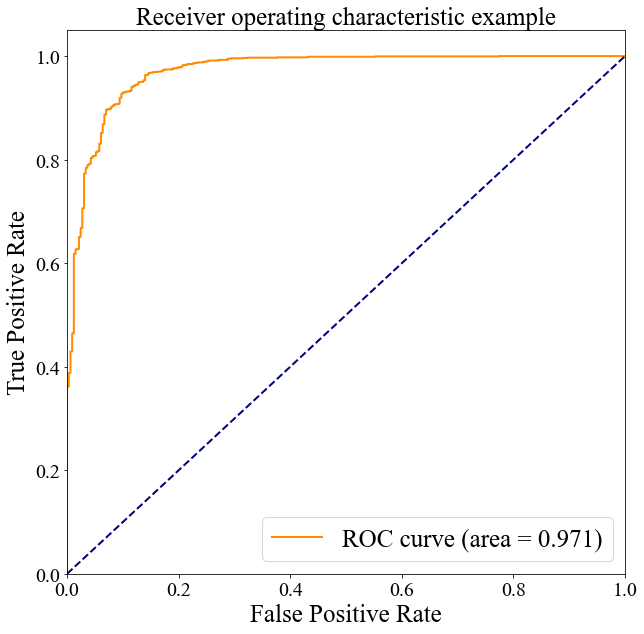

In [20]:
acu_curve(test_indepent_y,y_test_pred)